# 案例分析：共享单车需求
本数据包含某城市共享单车租借数据。共享单车使人们可以一个地方租借自行车并在另一个地方换车，符合目前低碳环保的理念。
新增知识点：
* 特征工程的概念
* 日期型变量的处理
* 相关性分析


## 问题： 

** 租车人数是由哪些因素决定的？**



## 数据特征描述

* datatime - 日期+时间
* season - 1=春天，2=夏天，3=秋天，4=冬天
* holiday - 是否是节假日
* workingday - 1=工作日 0=周末
* weather -
    * 1：晴天，多云
    * 2：雾天，阴天
    * 3：小雪，小雨
    * 4：大雨，大雪，大雾
* temp - 气温摄氏度
* atemp - 体感温度
* humidity - 湿度
* windspeed - 风速
* casual - 非注册用户个数
* registered - 注册用户个数
* count - 给定日期时间（每小时）总租车人数，是casual和registered的求和。

## 1、读取数据

In [1]:
# 导入数据分析包
import numpy as np
import pandas as pd

# 导入绘图工具包
import matplotlib.pyplot as plt
import seaborn as sns

# 导入日期时间变量处理相关的工具包
import calendar
from datetime import datetime

# 绘图设置
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# 读取数据
BikeData = pd.read_csv("bike.csv")

### 数据上手三部曲 
1. 了解数据大小
2. 查看前几行/最后几行数据
3. 查看数据类型与缺失值

In [3]:
# 第一步：查看数据大小
BikeData.shape

(10886, 12)

In [4]:
# 第二步：查看前10行数据
BikeData.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [5]:
# 第三步：查看数据类型与缺失值
# 大部分变量为整数型，温度和风速为浮点型变量
# datetime类型为object，我们将在下面进一步进行处理
# 没有缺失值！
BikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


## 2、日期型变量的处理

### 特征工程（feature engineering）
* 数据和特征决定了机器学习的上限，而一个好的模型只是逼近那个上限而已
* 我们的目标是尽可能得从原始数据上获取有用的信息，一些原始数据本身往往不能直接作为模型的变量。
* 特征工程是利用数据领域的相关知识来创建能够使机器学习算法达到最佳性能的特征的过程。

以datetime为例子，这个特征里包含了日期和时间点两个重要信息。我们还可以进一步从日期中导出其所对应的月份和星期数。



In [6]:
# 取datetime中的第一个元素为例，其数据类型为字符串，所以我们可以使用split方法将字符串拆开
# 日期+时间戳是一个非常常见的数据形式
ex = BikeData.datetime[1]
ex

'2011-01-01 01:00:00'

In [7]:
# 查看元素ex类型，为字符串
type(ex)

str

In [8]:
# 使用split方法将字符串拆开
ex.split()

['2011-01-01', '01:00:00']

### 2.1 通过datetime这个特征来生成租车的日期

In [9]:
# 获取日期数据
ex.split()[0]

'2011-01-01'

In [10]:
# 首先获得日期，定义一个函数使用split方法将日期+时间戳拆分为日期和
def get_date(x):
    return(x.split()[0])

# 使用pandas中的apply方法（第六节课中讲解过），对datatime使用函数get_date
BikeData["date"] = BikeData.datetime.apply(get_date)

BikeData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01


### 2.2 生成租车时间(24小时）

In [11]:
# 为了取小时数，我们需要进一步拆分
ex.split()[1]
#":"是分隔符
ex.split()[1].split(":")[0]

'01'

In [12]:
# 将上面的内容定义为get_hour的函数，然后使用apply到datatime这个特征上
def get_hour(x):
    return(x.split()[1].split(":")[0])

# 使用apply方法，获取整列数据的时间
BikeData["hour"] = BikeData.datetime.apply(get_hour)

BikeData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04


### 2.3 生成日期对应的星期数

In [13]:
# 首先引入calendar中的day_name，列举了周一到周日
calendar.day_name[:]

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [14]:
# 获取字符串形式的日期
dateString = ex.split()[0]

# 使用datatime中的striptime函数将字符串转换为日期时间类型
# 注意这里的datatime是一个包不是我们dataframe里的变量名
# 这里我们使用"%Y-%m-%d"来指定输入日期的格式是按照年月日排序，有时候可能会有月日年的排序形式
dateDT = datetime.strptime(dateString,"%Y-%m-%d")
type(dateDT)

datetime.datetime

In [15]:
# 然后使用weekday方法取出日期对应的星期数
# 是0-6的整数，星期一对应0， 星期日对应6
week_day = dateDT.weekday()
week_day

5

In [16]:
# 将星期数映射到其对应的名字上
calendar.day_name[week_day]

'Saturday'

In [17]:
# 现在将上述的过程融合在一起变成一个获取星期的函数
def get_weekday(dateString):
    week_day = datetime.strptime(dateString,"%Y-%m-%d").weekday()
    return(calendar.day_name[week_day])

# 使用apply方法，获取date整列数据的星期
BikeData["weekday"] = BikeData.date.apply(get_weekday)

BikeData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday


### 2.4 生成日期对应的月份

In [18]:
# 模仿上面的过程，我们可以提取日期对应的月份
# 注意：这里month是一个attribute不是一个函数，所以不用括号
def get_month(dateString):
    return(datetime.strptime(dateString,"%Y-%m-%d").month)

# 使用apply方法，获取date整列数据的月份
BikeData["month"] = BikeData.date.apply(get_month)

BikeData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,1


###  2.5 数据可视化举例

绘制租车人数的箱线图， 以及人数随时间（24小时）变化的箱线图

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Hour'),
 Text(0.5, 1.0, 'Box Plot On Count Across Hours')]

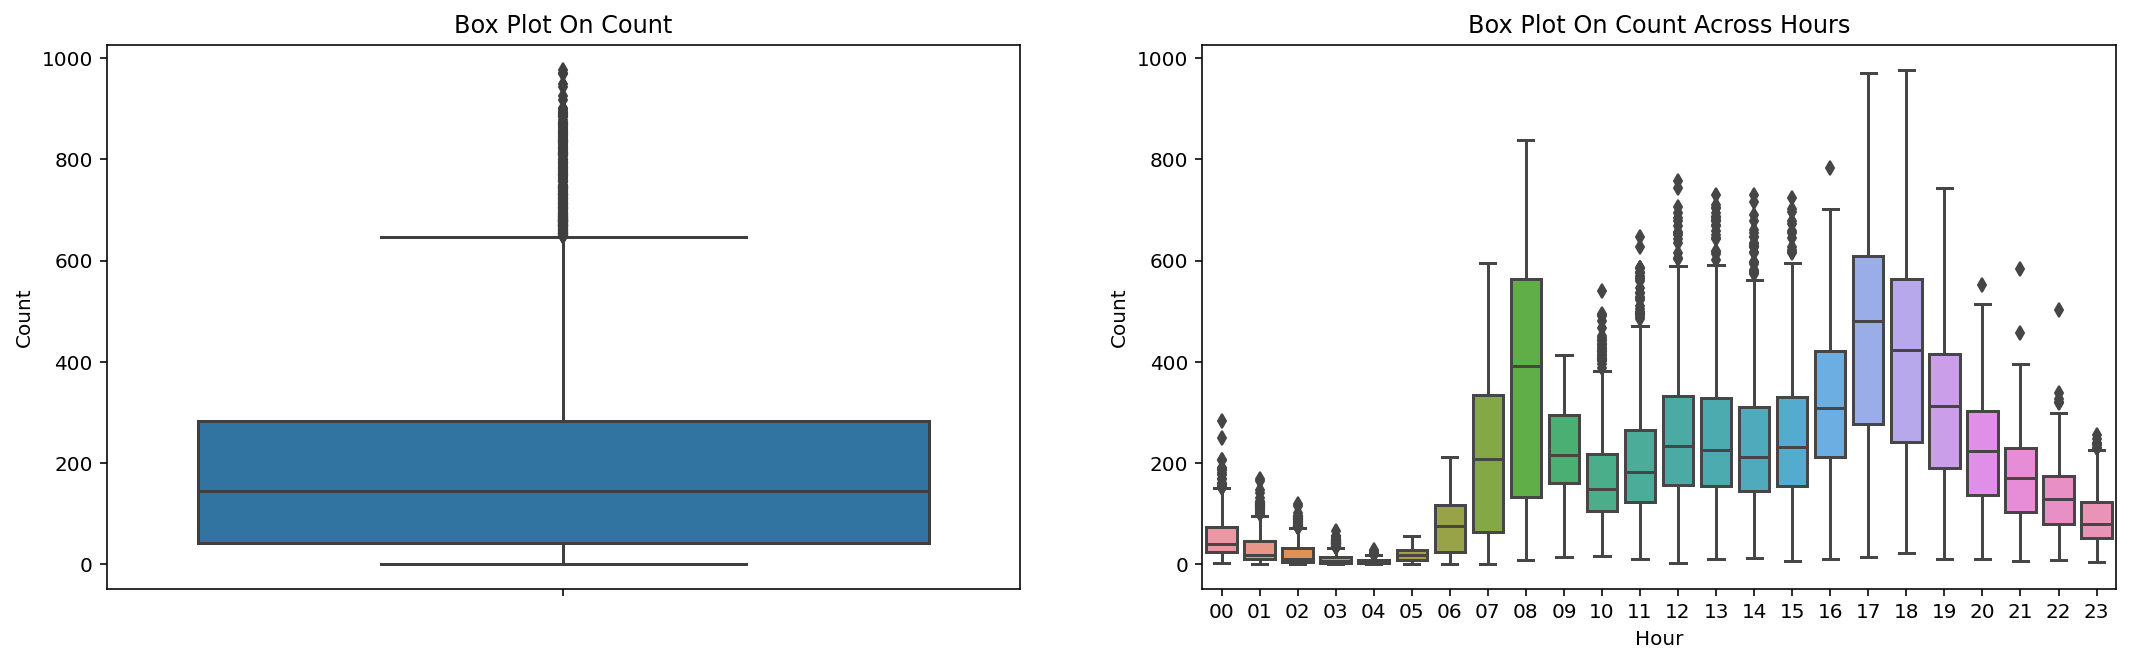

In [19]:
# 设置画布大小
fig = plt.figure(figsize = (18, 5))

# 添加第一个子图
# 租车人数的箱线图
ax1 = fig.add_subplot(121)
sns.boxplot(data=BikeData, y="count")
ax1.set(ylabel='Count',title="Box Plot On Count")

# 添加第二个子图
# 租车人数和时间的箱线图
# 商业洞察：租车人数由时间是如何变化的?
ax2 = fig.add_subplot(122)
sns.boxplot(data=BikeData, y="count", x="hour")
ax2.set(xlabel='Hour', ylabel='Count',title="Box Plot On Count Across Hours")


## 作业9-1：

模仿上面的例子，画出count与holiday的箱线图以及count与month的箱线图，并将上面的两幅图和新产生的两幅图放到一个画布里。

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Box Plot On Count Across Months')]

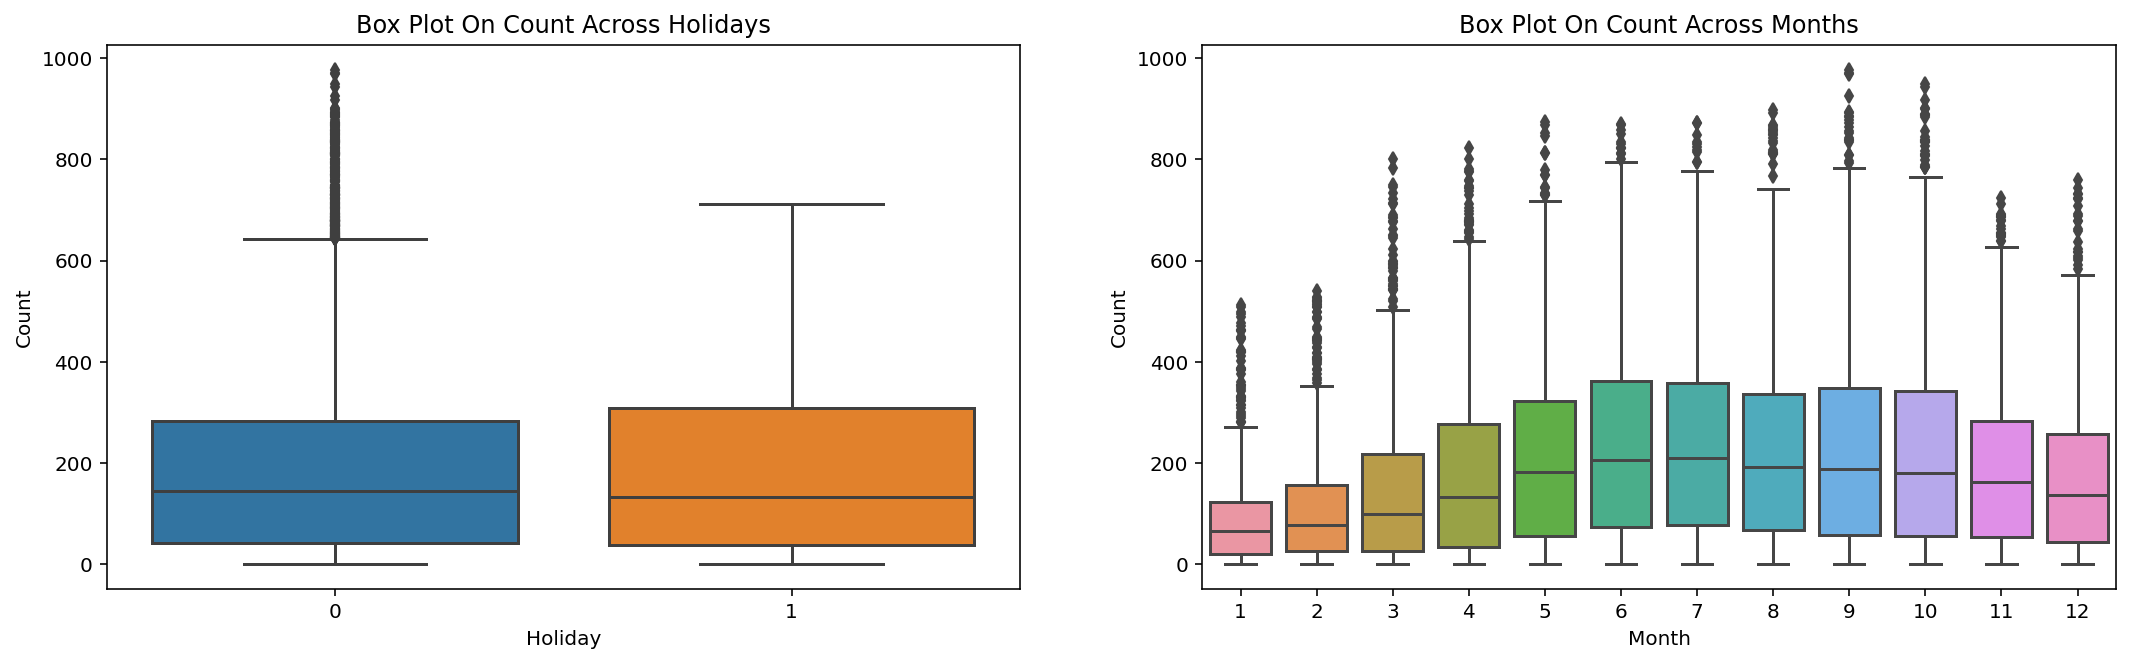

In [20]:
# 设置画布大小
fig = plt.figure(figsize = (18, 5))

# 添加第一个子图
# count与holiday的箱线图
ax1 = fig.add_subplot(121)
sns.boxplot(data=BikeData, y="count", x="holiday")
ax1.set(xlabel='Holiday', ylabel='Count',title="Box Plot On Count Across Holidays")

# 添加第二个子图
# count与month的箱线图
ax2 = fig.add_subplot(122)
sns.boxplot(data=BikeData, y="count", x="month")
ax2.set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Box Plot On Count Across Months')]

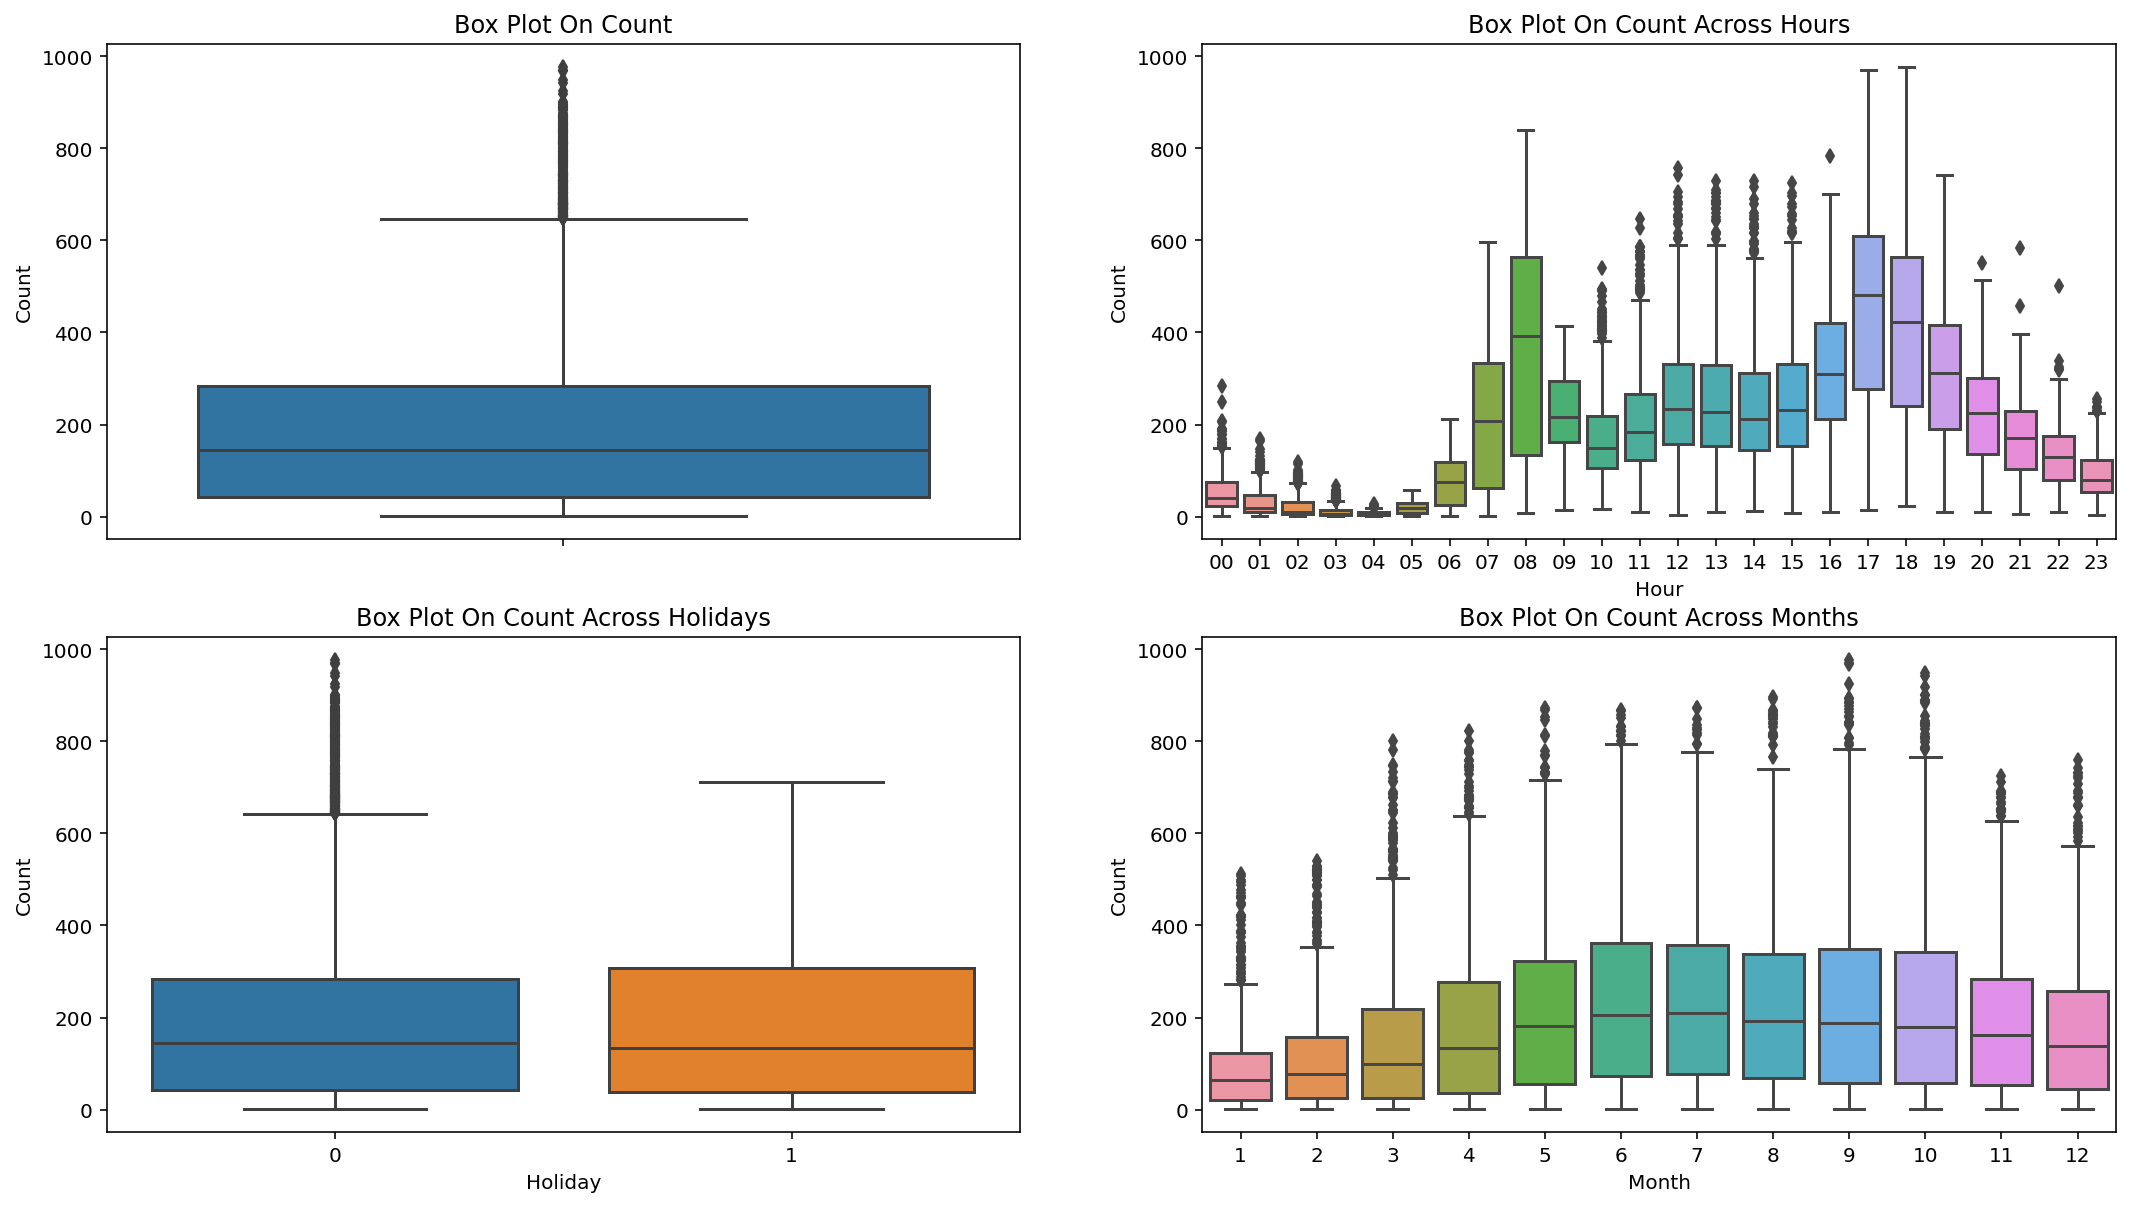

In [21]:
# 设置画布大小
fig = plt.figure(figsize = (18, 10))

# 添加第一个子图
# 租车人数的箱线图
ax1 = fig.add_subplot(221)
sns.boxplot(data=BikeData, y="count")
ax1.set(ylabel='Count',title="Box Plot On Count")

# 添加第二个子图
# 租车人数和时间的箱线图
# 商业洞察：租车人数由时间是如何变化的?
ax2 = fig.add_subplot(222)
sns.boxplot(data=BikeData, y="count", x="hour")
ax2.set(xlabel='Hour', ylabel='Count',title="Box Plot On Count Across Hours")

# 添加第三个子图
# count与holiday的箱线图
ax3 = fig.add_subplot(223)
sns.boxplot(data=BikeData, y="count", x="holiday")
ax3.set(xlabel='Holiday', ylabel='Count',title="Box Plot On Count Across Holidays")

# 添加第四个子图
# count与month的箱线图
ax4 = fig.add_subplot(224)
sns.boxplot(data=BikeData, y="count", x="month")
ax4.set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")

## 3、相关性分析（Correlation Analysis）
相关分析是一种基于不同特征相关系数的分析，是一种帮助我们理解特征是如何影响应变量（count）的常用方法。

### 3.1 相关系数的计算和可视化
相关系数是一个介于[-1,1]之间的一个实数。简单来说：
* 0表示没有线性相关性
* 负数表示一个值变大则另一个值有变小的趋势
* 正数表示一个值变大则另一个值有变大的趋势
* 相关系数的绝对值大小决定了这种线性相关性的强弱

In [22]:
# 计算先关系数 df.corr()
# 相关系数矩阵对角线的值永远为1，因为是特征本身与自己的相关系数 
# 相关系数矩阵是一个对称矩阵，我们只需要看上三角部分或者下三角部分即可
correlation = BikeData[["casual","registered","temp","atemp","humidity","windspeed","count"]].corr()
correlation

,casual,registered,temp,atemp,humidity,windspeed,count
casual,1.000000,0.497250,0.467097,0.462067,-0.348187,0.092276,0.690414
registered,0.497250,1.000000,0.318571,0.314635,-0.265458,0.091052,0.970948
temp,0.467097,0.318571,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.462067,0.314635,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.348187,-0.265458,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,0.092276,0.091052,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.690414,0.970948,0.394454,0.389784,-0.317371,0.101369,1.000000


** 观察上面的矩阵，我们有以下洞察**
* count 和 registered、casual 高度正相关，相关系数分别为0.69与0.97。因为count = casual + registered，所以这个正相关和预期相符。
* count 和 temp正相关，相关系数为0.39。一般来说，气温过低人们不愿意骑车出行。
* count 和 humidity（湿度）负相关，湿度过大的天气不适宜骑车。当然考虑湿度的同时也应该考虑温度。
* temp（温度）和 atemp（体感温度）高度正相关（0.98）。
* 风速似乎对从租车人数影响不大（0.10），但我们也应该考虑到极端大风天气出现频率应该不高。风速在正常范围内波动应该对人们租车影响不大。

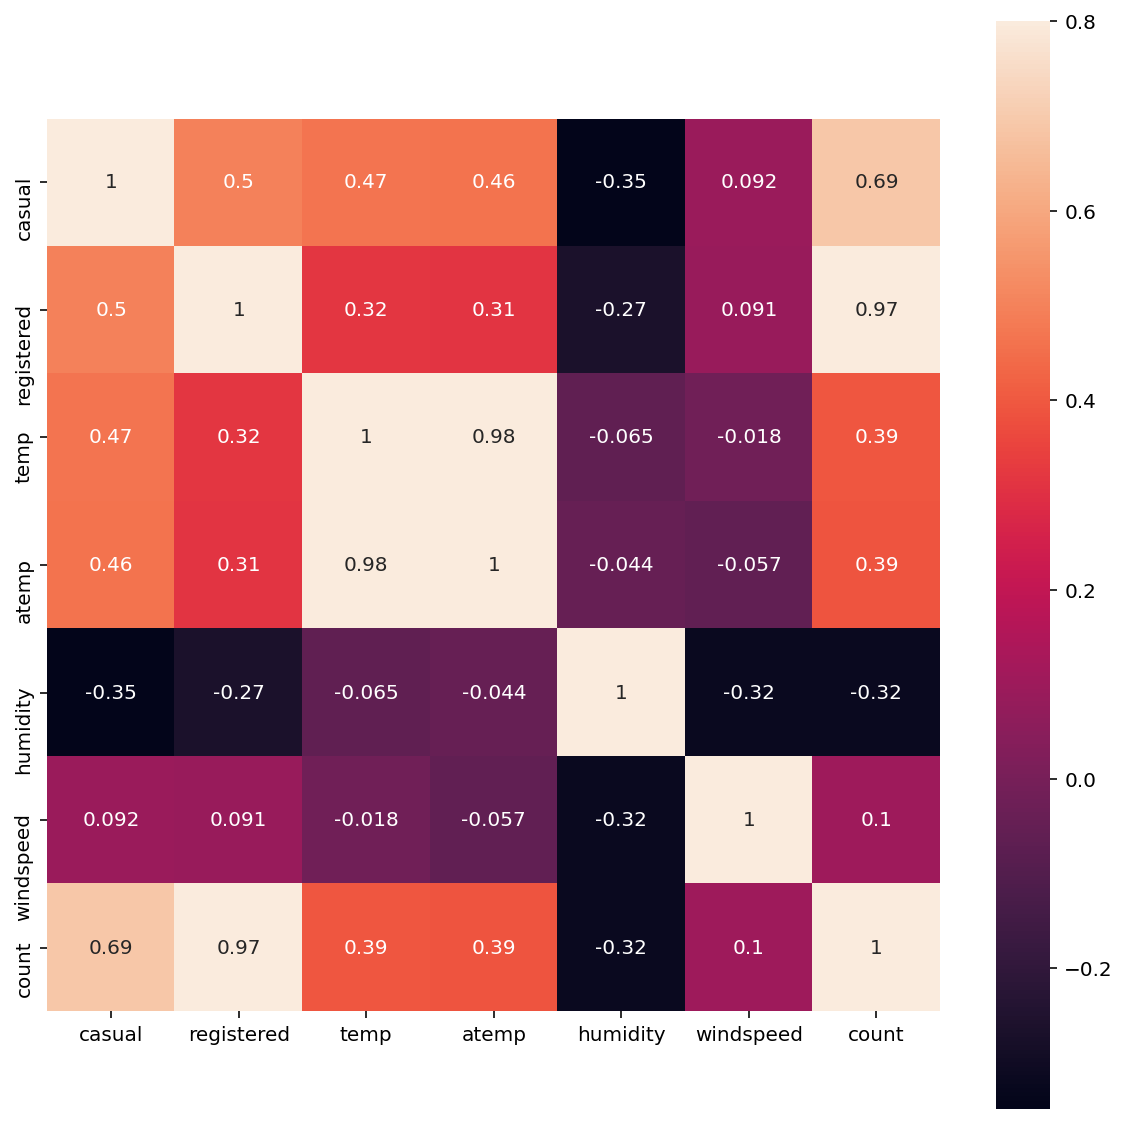

In [23]:
# 一般我们使用热地图（heat map）来更加直观地展示相关矩阵。
# 暖色表示正相关，冷色表示负相关；大小由深浅来表示。
# 由于对称性，我们只需考虑图形上半部分或者下半部分即可。
# 其实热地图和上面的相关矩阵携带的信息是一模一样的，只不过加上了颜色更加直观。
fig = plt.figure(figsize = (10, 10))
sns.heatmap(correlation, vmax=.8, square=True, annot=True)

### 3.2 在散点图中拟合简单线性回归
* 线性回归是利用数理统计中回归分析，来确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方法。
* 拟合一条直线更好的帮助我们查看趋势
* 可以证明直线的斜率就是相关系数

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


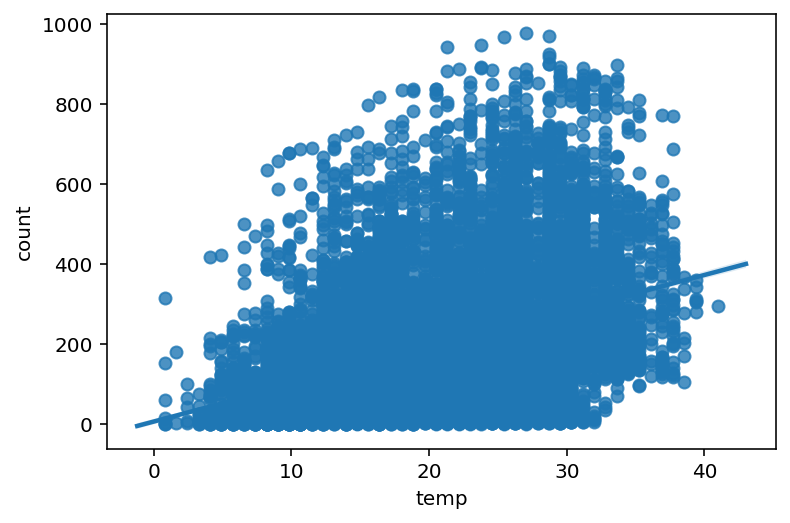

In [24]:
# count和temp的相关系数是0.39，在下面的斜率中体现出
# 我们使用seaborn中的regplot（regression plot）
sns.regplot(x="temp", y="count", data=BikeData)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


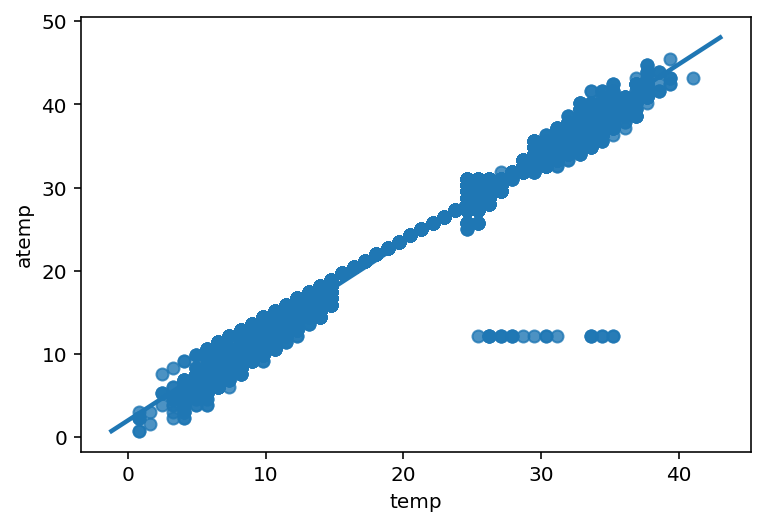

In [25]:
# 查看温度和体感温度的散点图，几乎是45度角斜率为1（0.98）
sns.regplot(x="temp", y="atemp", data=BikeData)

## 作业9-2：

在同一幅图中画出humidity和count的散点图以及windspeed和count的散点图，并分别加上简单线性回归直线

## 4、数据可视化

###  4.1 问题：什么样的温度和湿度情况下租车的人数最多？

*复习上节课中讲解的cut函数，并使用seaborn中的FacetGrid函数作图*



/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


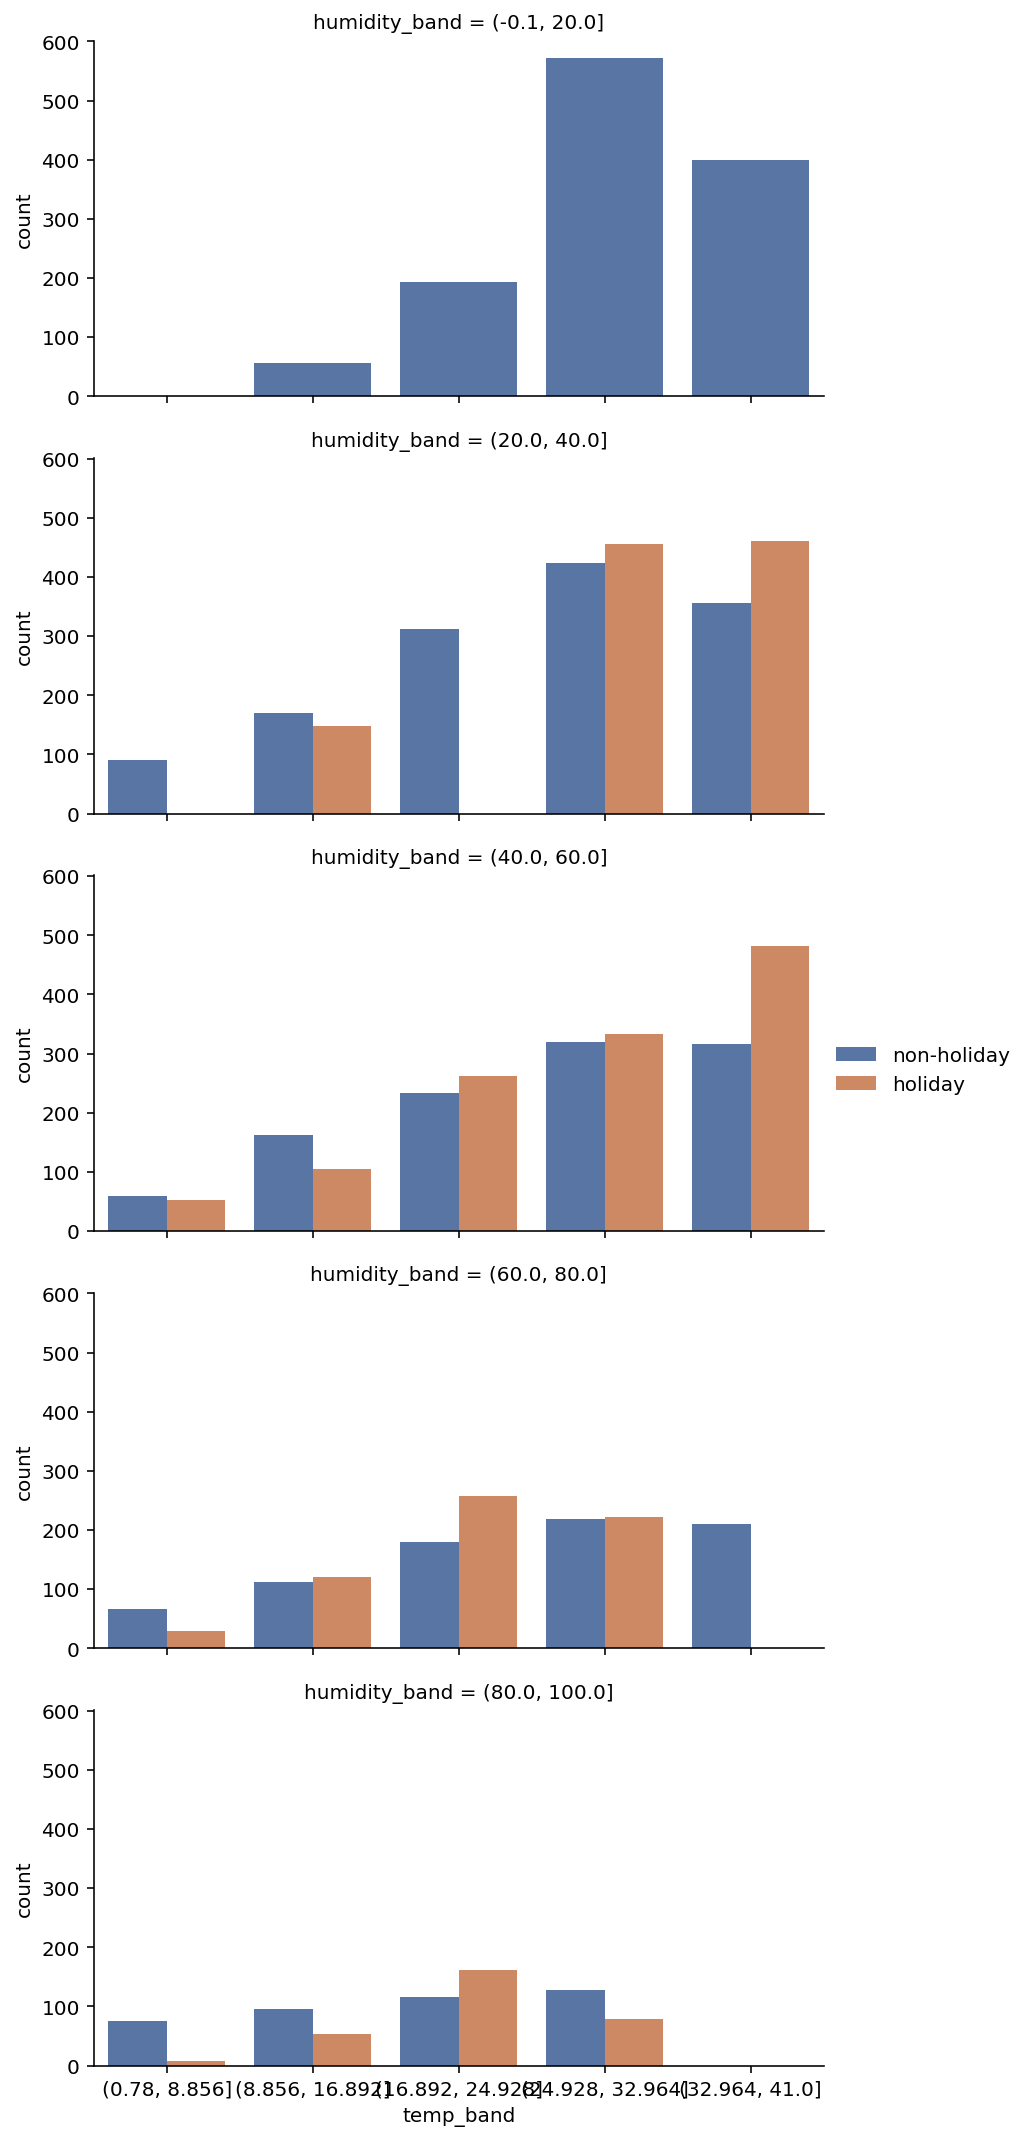

In [26]:
# 使用pd.cut()切分数据， 将连续变量humidity和temp离散化
BikeData['humidity_band'] = pd.cut(BikeData['humidity'], 5)
BikeData['temp_band'] = pd.cut(BikeData['temp'], 5)

# 使用map方法，将holiday数据做映射， 0对应'non-holiday'， 1对应 'holiday'
BikeData['holiday_cat'] = BikeData['holiday'].map( {0: 'non-holiday', 1: 'holiday'} )

# FacetGrid绘图
sns.FacetGrid(data = BikeData, row='humidity_band', size=3, aspect=2).\
    map(sns.barplot, 'temp_band', 'count',  'holiday_cat', palette='deep', ci=None).\
    add_legend()

**洞察：** 
* 湿度在 0-60， 温度在20-40之间的租车人数较多
* 一般情况下，假日的平均租车人数比非假日多。寒冷的天气下，非假日的租车人数比假日多。

###  4.2 不同季节，每个小时平均租车人数如何变化？

In [27]:
# 为了作图美观，图例清晰，我们先把季节1234转化为对应的标签
# 使用map方法进行映射
BikeData["season_label"] = BikeData.season.map({1:"spring",2: "summer",3:"fall",4:"winter"})

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


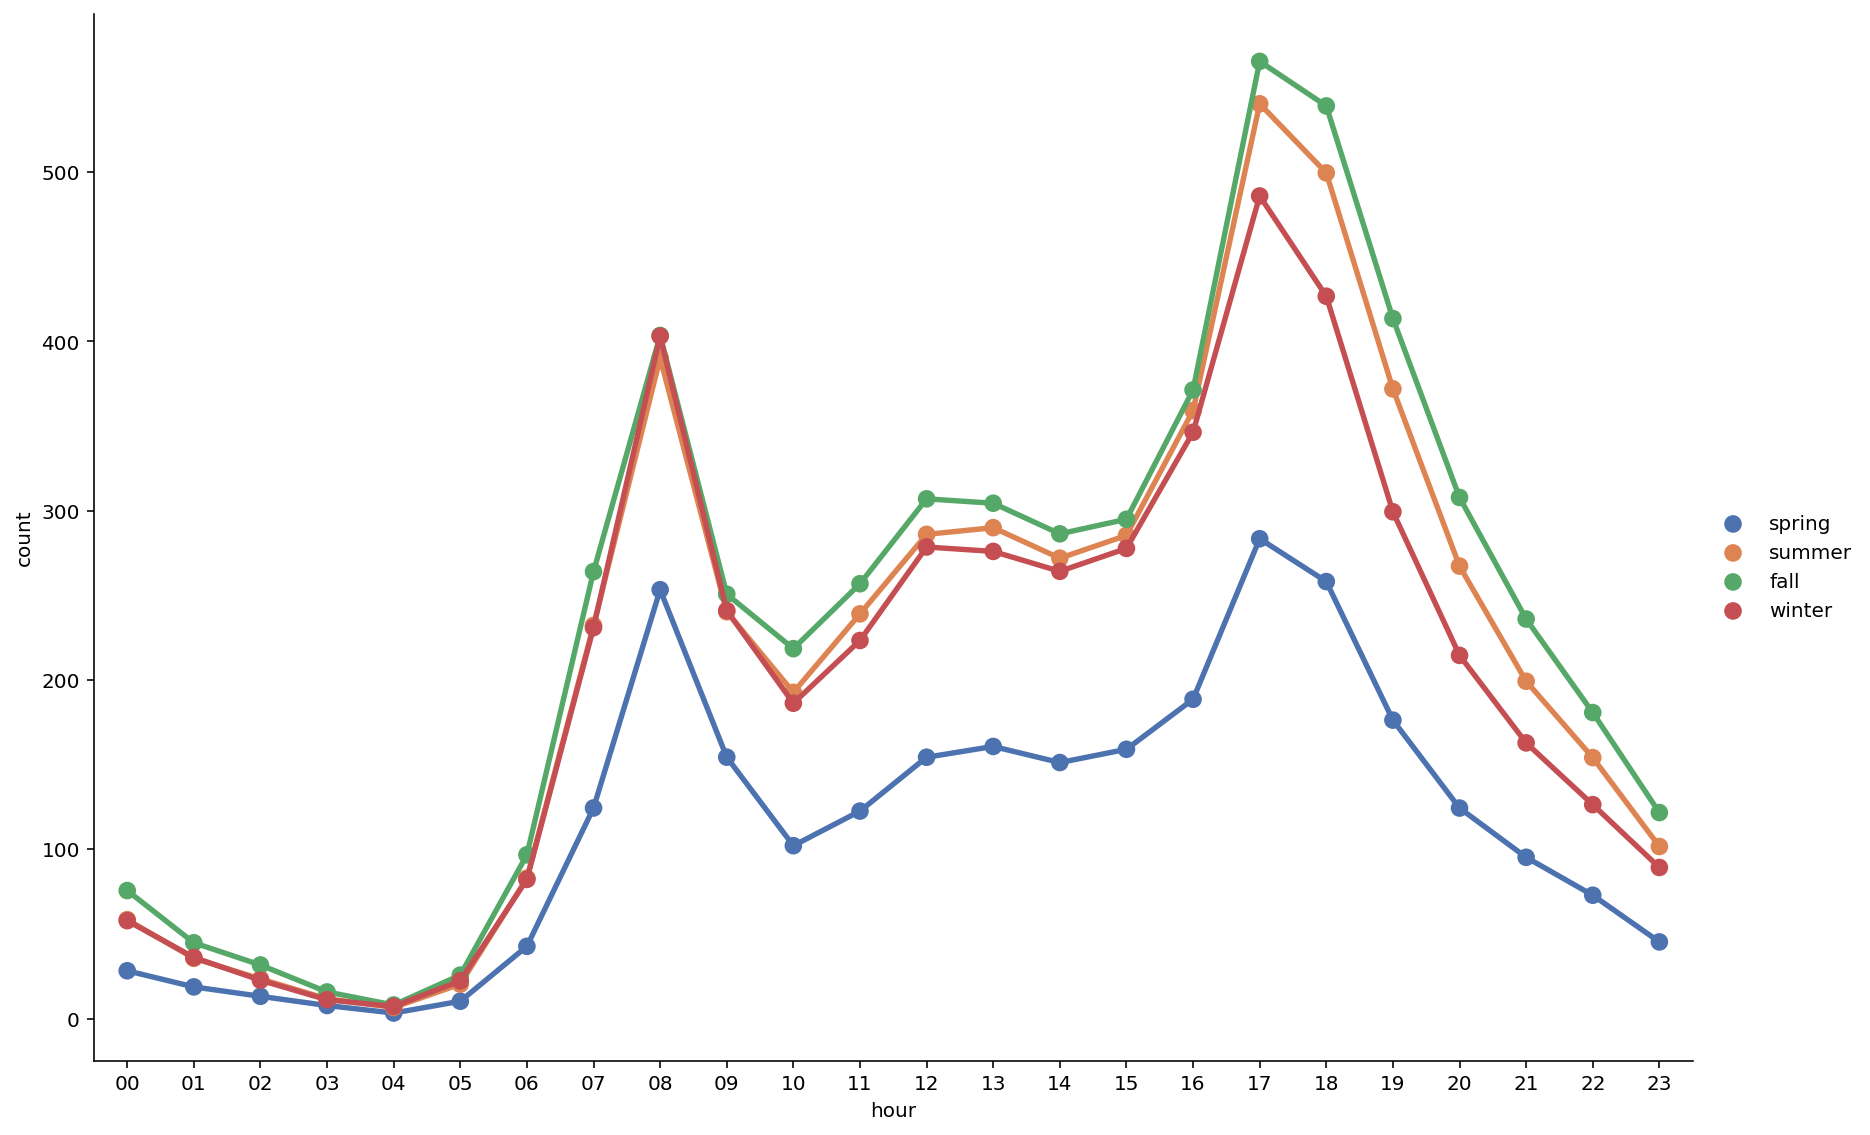

In [28]:
# 绘图
sns.FacetGrid(data = BikeData, size=8, aspect=1.5).\
    map(sns.pointplot, 'hour', 'count','season_label', palette='deep', ci=None).\
    add_legend()

**洞察：**
* 秋天和夏天租车人数最多
* 春天租车人数显著低于其他季节（可能和本地气候有关？）

### 4.3  不同天气情况下，每个月的平均租车人数如何变化？

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


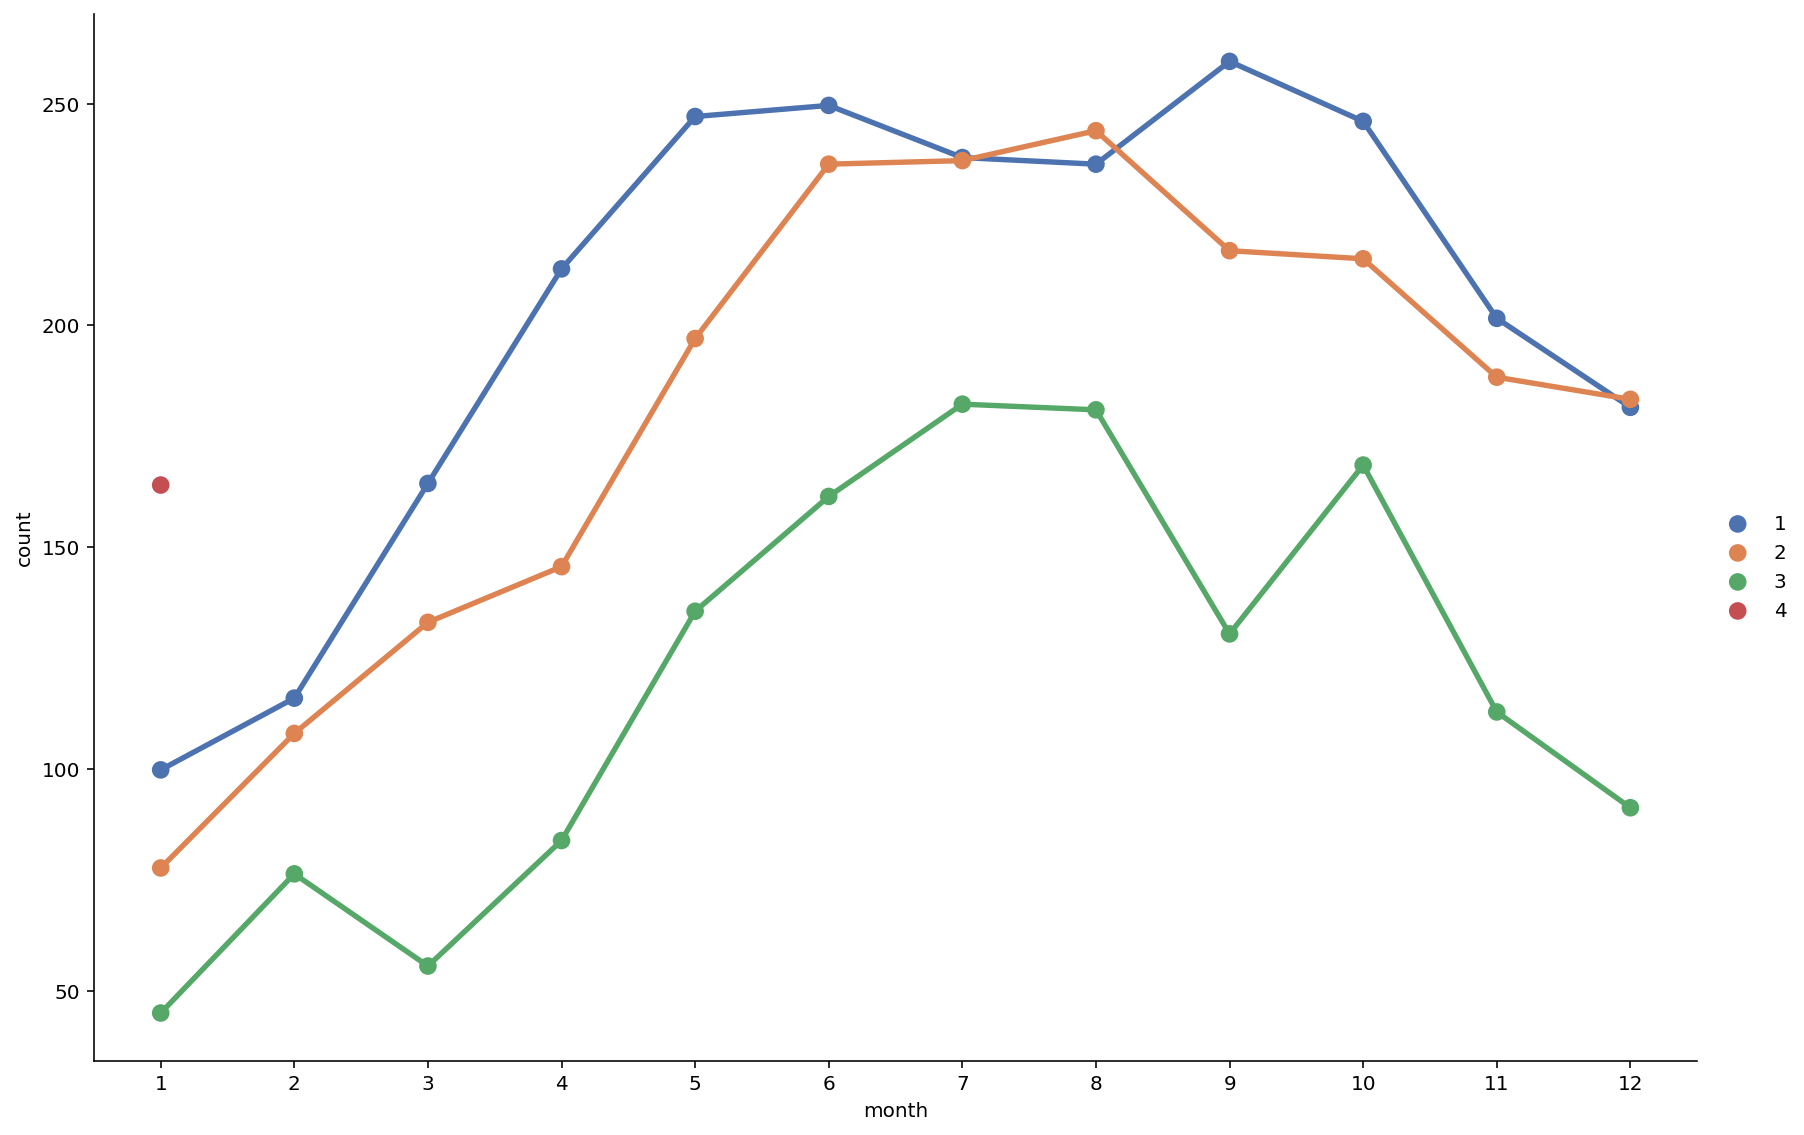

In [29]:
sns.FacetGrid(data = BikeData, size=8, aspect=1.5).\
    map(sns.pointplot, 'month', 'count','weather', palette='deep', ci=None).\
    add_legend()

**洞察：**
* 总体上，天气越好，租车的人数越多（晴天 > 多云、阴天 > 雨天）
* 5-10月的租车人数较多，从1月到5月，总体呈上升趋势，10月以后有明显的下降趋势。

## 作业9-3：
1. 使用map方法将weather改为有意义的标签
2. 画出按照星期数划分的每小时平均租车数量，并写出自己的洞察结果。

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


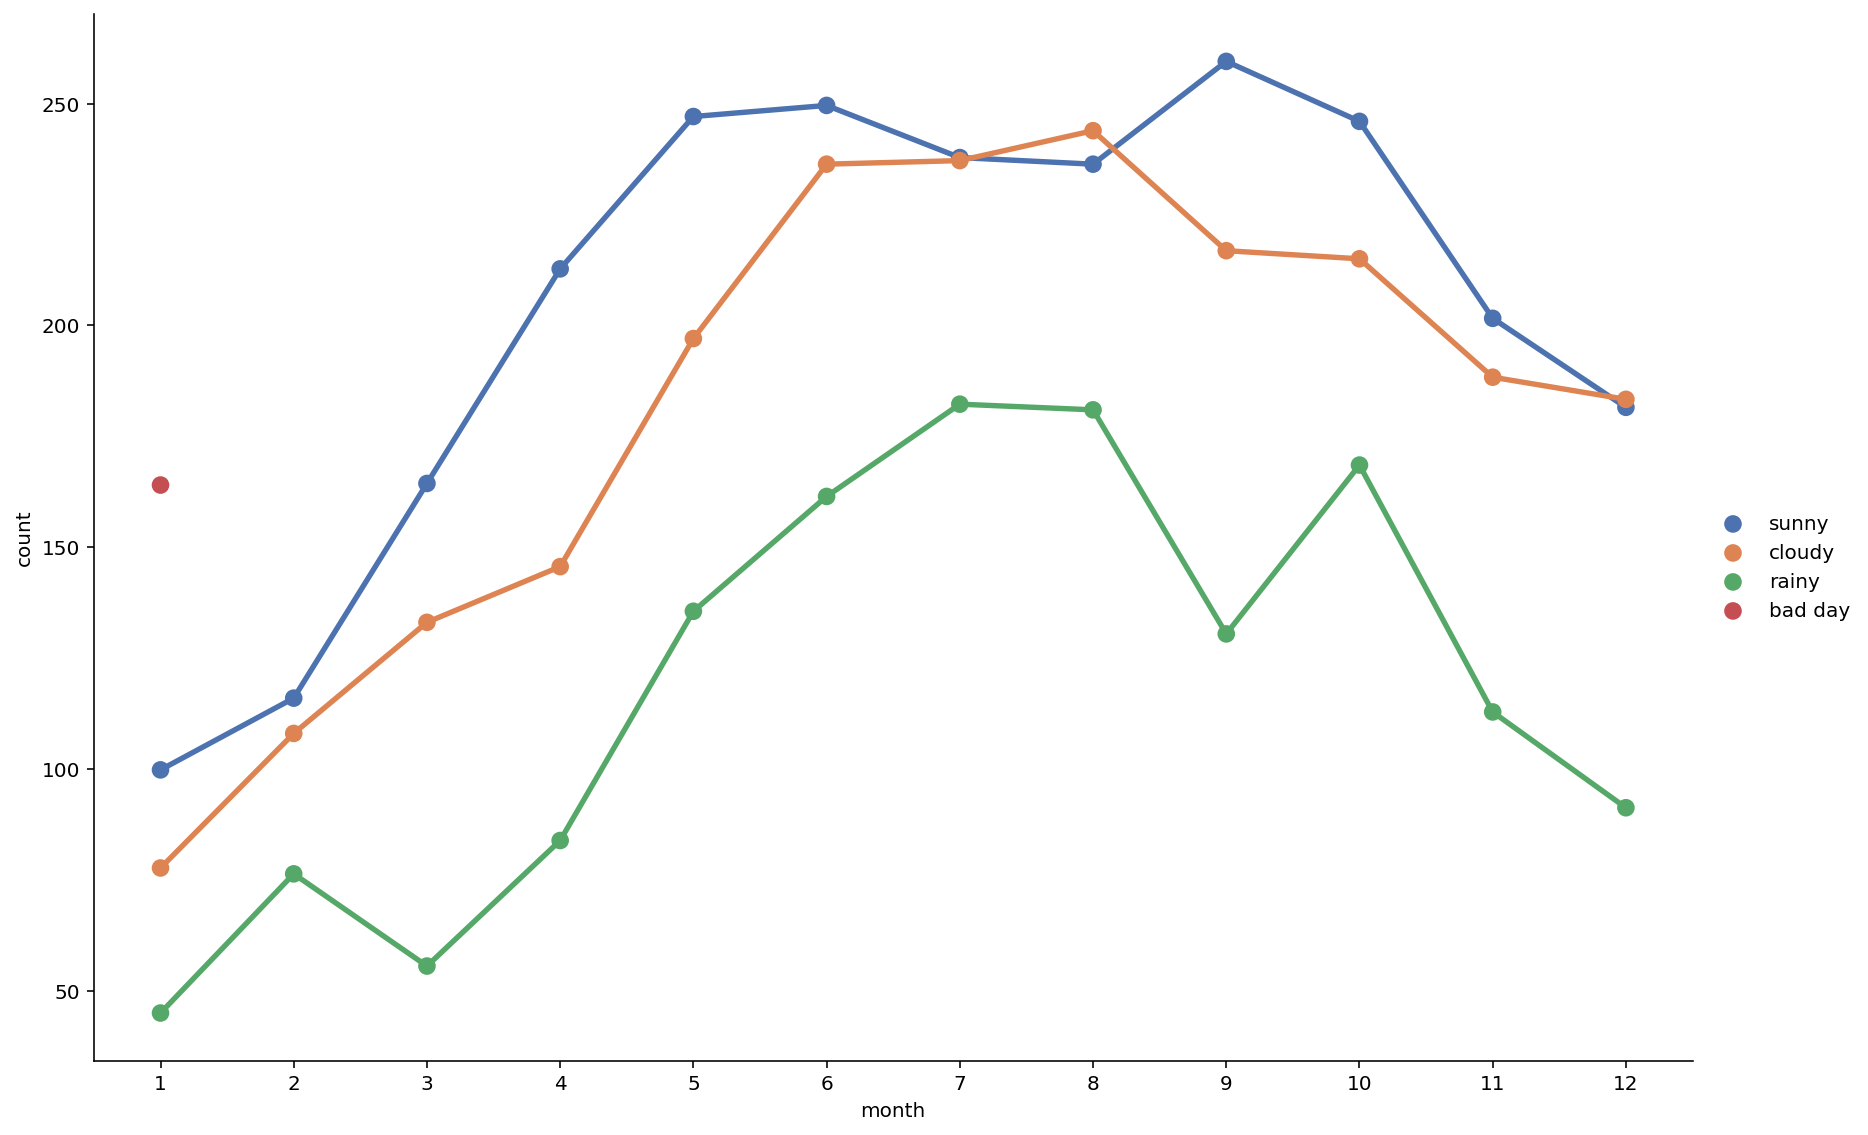

In [32]:
BikeData["weather"]=BikeData.weather.map({1:"sunny",2:"cloudy",3:"rainy",4:"bad day"})
sns.FacetGrid(data=BikeData, size=8, aspect=1.5).\
map(sns.pointplot,'month','count','weather', palette='deep', ci=None).\
add_legend()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


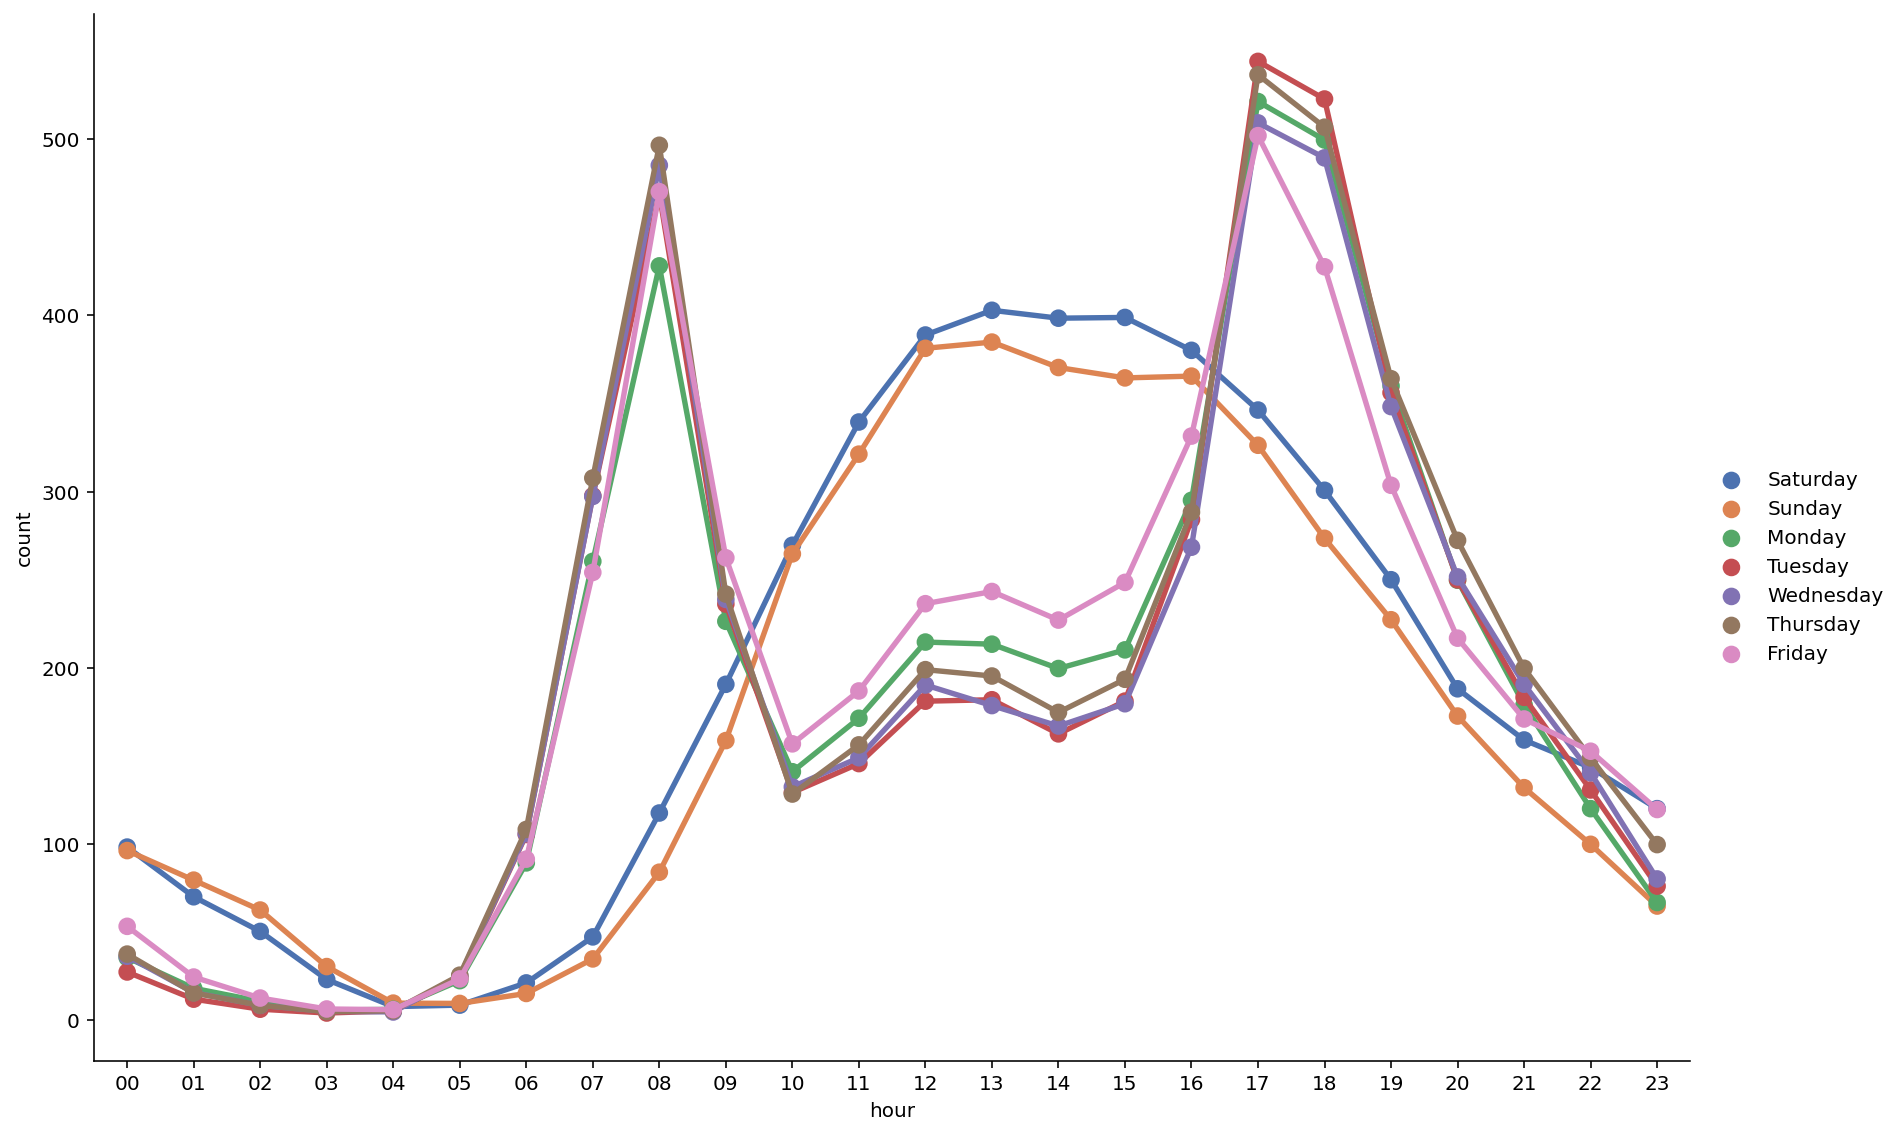

In [37]:
BikeData["weather"]=BikeData.weather.map({1:"sunny",2:"cloudy",3:"rainy",4:"bad day"})
sns.FacetGrid(data=BikeData, size=8, aspect=1.5).\
map(sns.pointplot,'hour','count','weekday', palette='deep', ci=None).\
add_legend()

In [ ]:
# 周六和周天租车高峰期在下午期间，工作日租车的高峰期是上下班高峰期。